### *Neonympha* classificiation with `pytorch` and `fastai`

Chris Hamm - 2019-09-19 (first code)

I have a lot of photos of *Neonympha* butterflies. Can a CNN tell them apart?

### Preliminaries

Prepare the computing environment

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
from fastai import *
from fastai.vision import *
batch_size = 16

Set the random seed

In [3]:
np.random.seed(1138)

Read in the data

In [4]:
image_path = '../data/images/'

In [5]:
file_names = get_image_files(image_path)
print(file_names[:4])

[PosixPath('../data/images/Nhe_FL5.JPG'), PosixPath('../data/images/Nmi_1921.JPG'), PosixPath('../data/images/Nmi_1927.JPG'), PosixPath('../data/images/Nfr_4359.JPG')]


Creat the pattern to identify the categories (Nmi, Nfr, Nar, Nhe)

In [6]:
cat_pat = '(N[a-z][a-z])'

In [41]:
image_data = ImageDataBunch.from_name_re(image_path, file_names, \
                                         pat = cat_pat, ds_tfms = get_transforms(), \
                                         size = 301, bs = batch_size)

Normalize the data

In [42]:
image_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (368 items)
x: ImageList
Image (3, 301, 301),Image (3, 301, 301),Image (3, 301, 301),Image (3, 301, 301),Image (3, 301, 301)
y: CategoryList
Nhe,Nmi,Nmi,Nmi,Nmi
Path: ../data/images;

Valid: LabelList (91 items)
x: ImageList
Image (3, 301, 301),Image (3, 301, 301),Image (3, 301, 301),Image (3, 301, 301),Image (3, 301, 301)
y: CategoryList
Nmi,Nar,Nar,Nmi,Nmi
Path: ../data/images;

Test: None

In [43]:
print(image_data.classes)

['Nar', 'Nfr', 'Nhe', 'Nmi']


Print some images

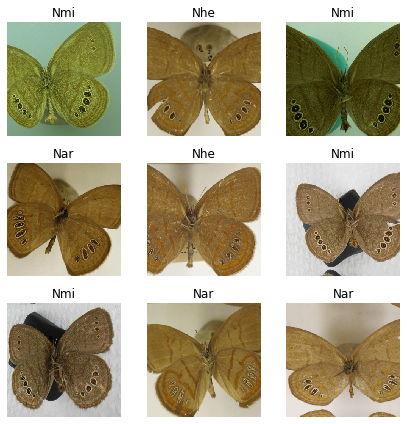

In [44]:
image_data.show_batch(rows = 3, figsize = (6, 6))

In [ ]:
len(image_data.classes), image_data.c

### Train `resnet34`

In [45]:
image_learn34 = cnn_learner(image_data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:07<00:00, 11.1MB/s]


In [46]:
image_learn34.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.112924,0.206132,0.098901,00:13
1,0.665194,0.147933,0.054945,00:13
2,0.485251,0.138102,0.076923,00:13
3,0.414839,0.119076,0.065934,00:13


### Results

In [47]:
interpretation34 = ClassificationInterpretation.from_learner(image_learn34)

losses34, idxs34 = interpretation34.top_losses()

len(image_data.valid_ds) == len(losses34) == len(idxs34)

True

Save the model

In [ ]:
image_learn23.save('model34_1')

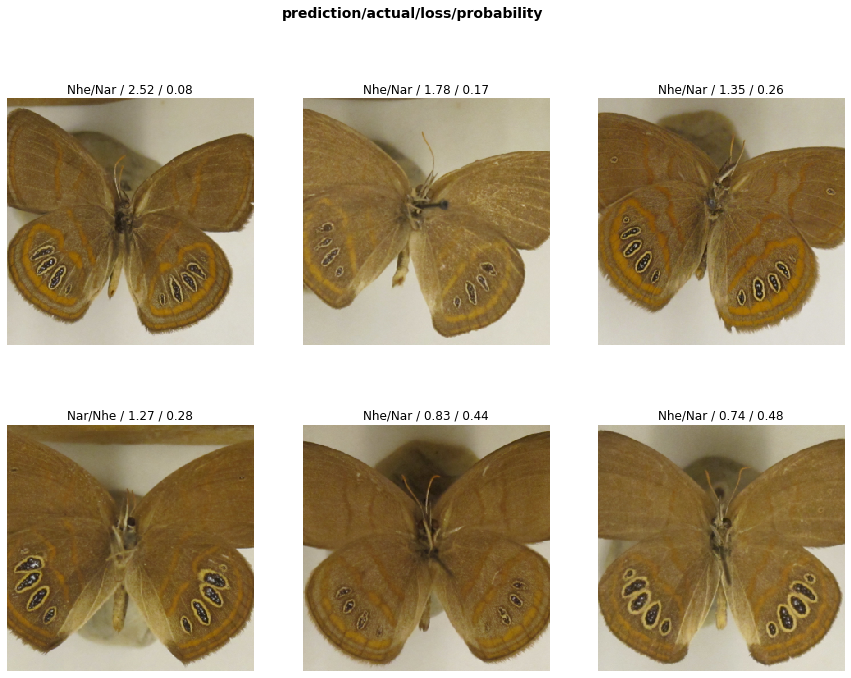

In [49]:
interpretation34.plot_top_losses(6, figsize = (15, 11))

In [ ]:
# doc(interpretation.plot_top_losses)

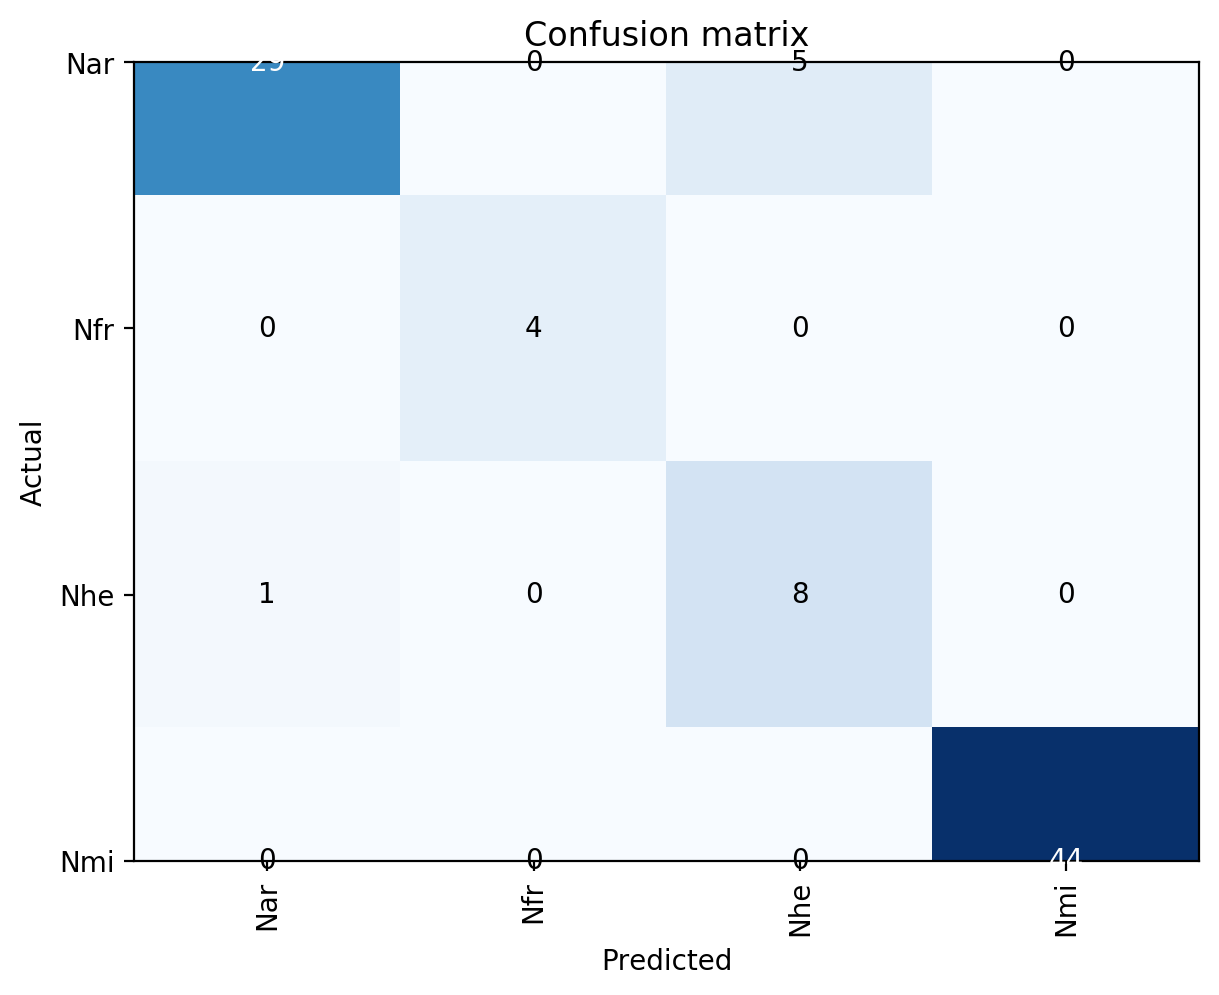

In [50]:
interpretation34.plot_confusion_matrix(figsize = (6, 6), dpi = 200)

In [72]:
interpretation34.most_confused(min_val = 0) # only Nhe and Nar are confused

[('Nar', 'Nhe', 5),
 ('Nhe', 'Nar', 1),
 ('Nar', 'Nar', 0),
 ('Nar', 'Nfr', 0),
 ('Nar', 'Nmi', 0),
 ('Nfr', 'Nar', 0),
 ('Nfr', 'Nfr', 0),
 ('Nfr', 'Nhe', 0),
 ('Nfr', 'Nmi', 0),
 ('Nhe', 'Nfr', 0),
 ('Nhe', 'Nhe', 0),
 ('Nhe', 'Nmi', 0),
 ('Nmi', 'Nar', 0),
 ('Nmi', 'Nfr', 0),
 ('Nmi', 'Nhe', 0),
 ('Nmi', 'Nmi', 0)]

### `resnet34` unfreezing, fine-tuning, and learning rates

In [ ]:
image_learn34.load('model34_1')

In [ ]:
# Need to add validation set
image_learn34.lr_find()

In [ ]:
image_learn34.recorder.plot()

## Training `resnet50`

In [52]:
image_learn50 = cnn_learner(image_data, models.resnet50, metrics = error_rate)

In [53]:
image_learn50.fit_one_cycle(4) #error_rate 0.032967 as low as can go

epoch,train_loss,valid_loss,error_rate,time
0,0.905449,0.161613,0.054945,00:15
1,0.625867,0.105888,0.043956,00:14
2,0.431600,0.082807,0.032967,00:13
3,0.333407,0.077571,0.032967,00:14


### Results

In [54]:
interpretation50 = ClassificationInterpretation.from_learner(image_learn50)

losses50, idxs50 = interpretation50.top_losses()

len(image_data.valid_ds) == len(losses50) == len(idxs50)

True

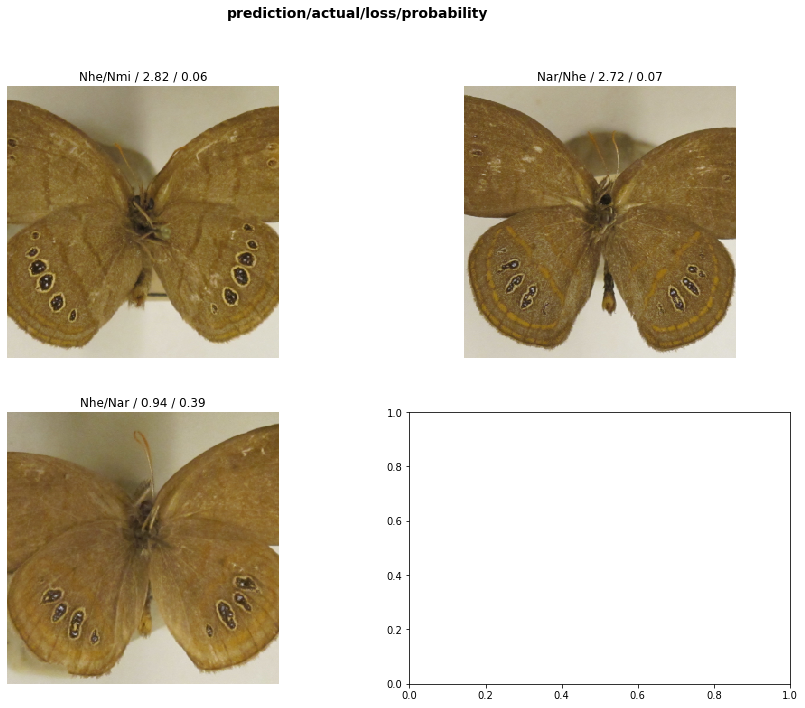

In [56]:
interpretation50.plot_top_losses(3, figsize = (15, 11))

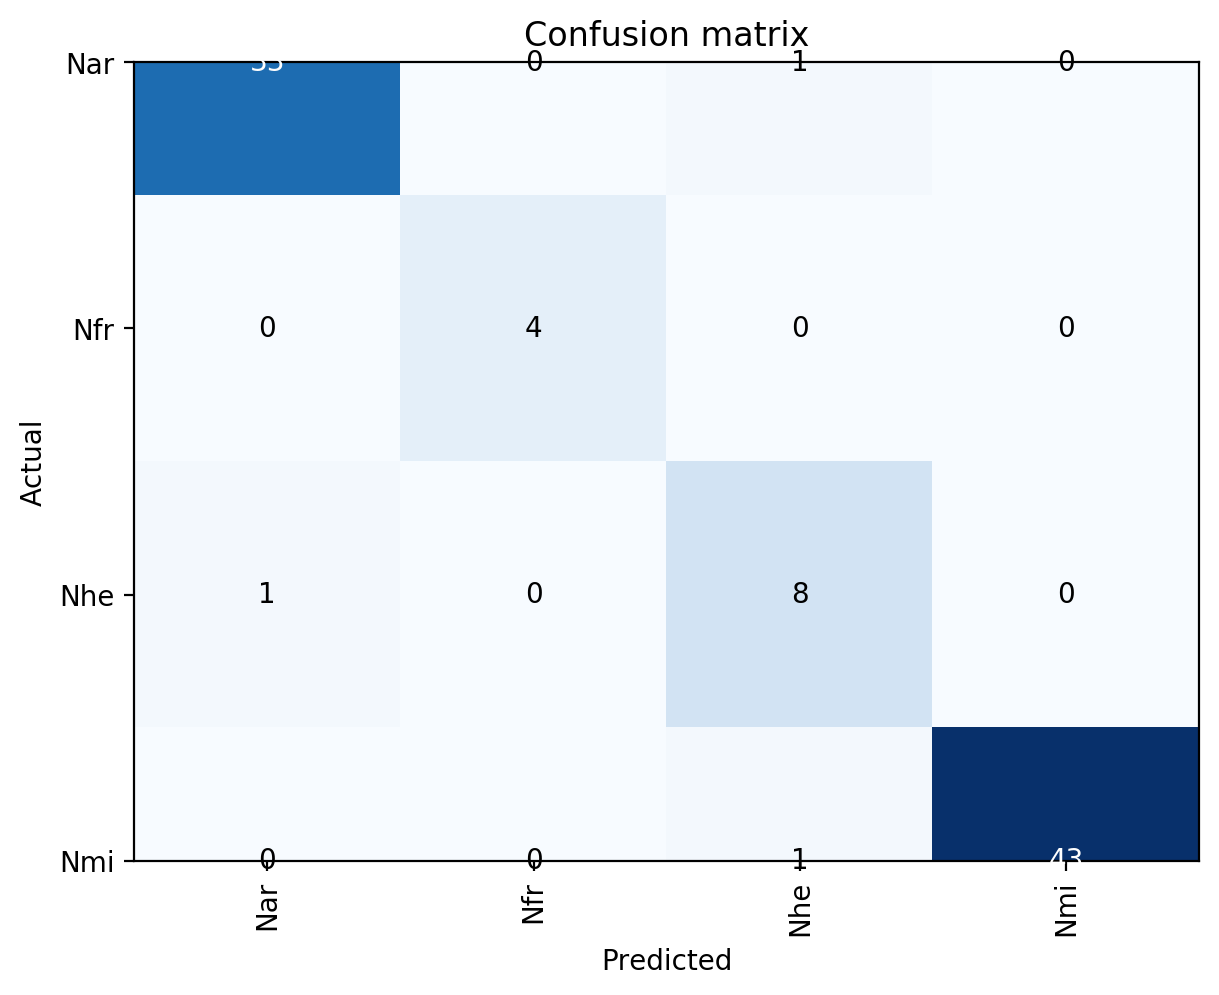

In [57]:
interpretation50.plot_confusion_matrix(figsize = (6, 6), dpi = 200)

In [71]:
interpretation34.most_confused(min_val = 0) # only Nhe and Nar are confused

[('Nar', 'Nhe', 5),
 ('Nhe', 'Nar', 1),
 ('Nar', 'Nar', 0),
 ('Nar', 'Nfr', 0),
 ('Nar', 'Nmi', 0),
 ('Nfr', 'Nar', 0),
 ('Nfr', 'Nfr', 0),
 ('Nfr', 'Nhe', 0),
 ('Nfr', 'Nmi', 0),
 ('Nhe', 'Nfr', 0),
 ('Nhe', 'Nhe', 0),
 ('Nhe', 'Nmi', 0),
 ('Nmi', 'Nar', 0),
 ('Nmi', 'Nfr', 0),
 ('Nmi', 'Nhe', 0),
 ('Nmi', 'Nmi', 0)]

### Update model

In [60]:
# Need to add validation set
image_learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


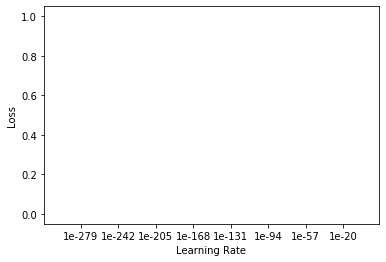

In [61]:
image_learn50.recorder.plot()

In [62]:
image_learn50.unfreeze()
image_learn50.fit_one_cycle(2, max_lr = slice(1e-5, 1e-4)) #0.021978 error_rate at 229 pixel images

epoch,train_loss,valid_loss,error_rate,time
0,0.192880,0.079797,0.032967,00:14
1,0.190897,0.102291,0.032967,00:15
